# Merge ontology demo
In this notebook I use the python API to make a key binding for using segment equivalences to collapse/expand the atlas in Neuroglancer. 

You will need to make sure to have the file allen.json downloaded. This is available in this git repository under the subfolder data/ from this notebook's location.

In [89]:
import neuroglancer
import json, csv
import numpy as np
import graphviz
import pandas as pd
import tifffile
import matplotlib.pyplot as plt
import copy
%matplotlib inline  

In [50]:
annotation_vol_2017_32bit_filename = '/home/ahoag/ngdemo/data/allen_atlas/annotation_2017_25um_sagittal_forDVscans.tif'
annotation_vol_2017_32bit = np.array(tifffile.imread(annotation_vol_2017_32bit_filename),dtype='uint32')

In [154]:
df_filename = '/home/ahoag/ngdemo/data/allen_atlas/allen_id_table_w_voxel_counts.xlsx'
df_allen = pd.read_excel(df_filename)
ids=df_allen['id']
names = df_allen['name']
parent_ids=df_allen['parent_structure_id']
ss_id_dict = {ids[ii]:names[ii] for ii in range(len(df_allen))}
ss_name_dict = {names[ii]:ids[ii] for ii in range(len(df_allen))}


In [1]:
pwd

'/home/ahoag/Git/lightsheet_helper_scripts/neuroglancer'

In [90]:
ontology_file = './data/allen.json'

with open(ontology_file) as json_file:
    data = json.load(json_file)

In [91]:
data

{'id': 997,
 'atlas_id': -1,
 'ontology_id': 1,
 'acronym': 'root',
 'name': 'root',
 'color_hex_triplet': 'FFFFFF',
 'graph_order': 0,
 'st_level': 0,
 'hemisphere_id': 3,
 'parent_structure_id': None,
 'children': [{'id': 8,
   'atlas_id': 0,
   'ontology_id': 1,
   'acronym': 'grey',
   'name': 'Basic cell groups and regions',
   'color_hex_triplet': 'BFDAE3',
   'graph_order': 1,
   'st_level': 1,
   'hemisphere_id': 3,
   'parent_structure_id': 997,
   'children': [{'id': 567,
     'atlas_id': 70,
     'ontology_id': 1,
     'acronym': 'CH',
     'name': 'Cerebrum',
     'color_hex_triplet': 'B0F0FF',
     'graph_order': 2,
     'st_level': 2,
     'hemisphere_id': 3,
     'parent_structure_id': 8,
     'children': [{'id': 688,
       'atlas_id': 85,
       'ontology_id': 1,
       'acronym': 'CTX',
       'name': 'Cerebral cortex',
       'color_hex_triplet': 'B0FFB8',
       'graph_order': 3,
       'st_level': 3,
       'hemisphere_id': 3,
       'parent_structure_id': 567,
   

In [202]:
new_vol = np.zeros_like(annotation_vol_2017_32bit,dtype='uint16')
np.shape(new_vol)

(456, 528, 320)

In [203]:
new_vol.dtype

dtype('uint16')

In [51]:
segments_32bit = np.unique(annotation_vol_2017_32bit)

In [53]:
# There appear to be some regions in the volume that are not in the graph. Let's find how many
for segment_32bit in segments_32bit:
    if segment_32bit not in new_dic.keys():
        print(segment_32bit)

0
182305696
182305712
312782560
312782592
312782656
484682464
526157184
526322272
527696992
549009216
560581568
563807424
576073728
589508416
589508480
599626944
606826624
606826688
607344832
614454272


In [55]:
unlabeled_ids = []
for segment_32bit in segments_32bit:
    if segment_32bit not in new_dic.keys() and segment_32bit != 0:
        unlabeled_ids.append(segment_32bit)
','.join([str(x) for x in unlabeled_ids])

'182305696,182305712,312782560,312782592,312782656,484682464,526157184,526322272,527696992,549009216,560581568,563807424,576073728,589508416,589508480,599626944,606826624,606826688,607344832,614454272'

In [56]:
len(unlabeled_ids)

20

In [188]:
# Make a list of dictionaries which will be the entries for these 
# regions which are missing in the JSON ontology file
add_dict_list = [
    {"id":182305696,
               "atlas_id": None,
               "ontology_id": 1,
               "acronym": "SSp-un2",
               "name": "Primary somatosensory area, unassigned 2",
               "color_hex_triplet": "188064",
               "graph_order": 1327,
               "st_level": 9,
               "hemisphere_id": 3,
               "parent_structure_id": 322,
               "children": []
              },
    {"id":182305712,
               "atlas_id": None,
               "ontology_id": 1,
               "acronym": "SSp-un3",
               "name": "Primary somatosensory area, unassigned 3",
               "color_hex_triplet": "188064",
               "graph_order": 1328,
               "st_level": 9,
               "hemisphere_id": 3,
               "parent_structure_id": 322,
               "children": []
              },
    {"id":312782560,
               "atlas_id": None,
               "ontology_id": 1,
               "acronym": "Isocortex-un1",
               "name": "Isocortex, unassigned area 1",
               "color_hex_triplet": "188064",
               "graph_order": 1329,
               "st_level": 9,
               "hemisphere_id": 3,
               "parent_structure_id": 315,
               "children": []
              },
    {"id":312782592,
               "atlas_id": None,
               "ontology_id": 1,
               "acronym": "Isocortex-un2",
               "name": "Isocortex, unassigned area 2",
               "color_hex_triplet": "188064",
               "graph_order": 1330,
               "st_level": 9,
               "hemisphere_id": 3,
               "parent_structure_id": 315,
               "children": []
              },
    {"id":312782656,
               "atlas_id": None,
               "ontology_id": 1,
               "acronym": "Isocortex-un3",
               "name": "Isocortex, unassigned area 3",
               "color_hex_triplet": "188064",
               "graph_order": 1331,
               "st_level": 9,
               "hemisphere_id": 3,
               "parent_structure_id": 315,
               "children": []
              },
    {"id":484682464,
               "atlas_id": None,
               "ontology_id": 1,
               "acronym": "HPF-un",
               "name": "Hippocampal formation, unassigned",
               "color_hex_triplet": "188064",
               "graph_order": 1332,
               "st_level": 9,
               "hemisphere_id": 3,
               "parent_structure_id": 1089,
               "children": []
              },
    {"id":526157184,
               "atlas_id": None,
               "ontology_id": 1,
               "acronym": "Isocortex-un4",
               "name": "Isocortex, unassigned area 4",
               "color_hex_triplet": "188064",
               "graph_order": 1333,
               "st_level": 9,
               "hemisphere_id": 3,
               "parent_structure_id": 315,
               "children": []
              },
    {"id":526322272,
               "atlas_id": None,
               "ontology_id": 1,
               "acronym": "Isocortex-un5",
               "name": "Isocortex, unassigned area 5",
               "color_hex_triplet": "188064",
               "graph_order": 1334,
               "st_level": 9,
               "hemisphere_id": 3,
               "parent_structure_id": 315,
               "children": []
              },
    {"id":527696992,
               "atlas_id": None,
               "ontology_id": 1,
               "acronym": "Isocortex-un6",
               "name": "Isocortex, unassigned area 6",
               "color_hex_triplet": "188064",
               "graph_order": 1335,
               "st_level": 9,
               "hemisphere_id": 3,
               "parent_structure_id": 315,
               "children": []
              },
    {"id":549009216,
               "atlas_id": None,
               "ontology_id": 1,
               "acronym": "MB-un",
               "name": "Midbrain, unassigned area",
               "color_hex_triplet": "188064",
               "graph_order": 1336,
               "st_level": 9,
               "hemisphere_id": 3,
               "parent_structure_id": 313,
               "children": []
              },
    {"id":560581568,
               "atlas_id": None,
               "ontology_id": 1,
               "acronym": "Isocortex-un7",
               "name": "Isocortex, unassigned area 7",
               "color_hex_triplet": "188064",
               "graph_order": 1337,
               "st_level": 9,
               "hemisphere_id": 3,
               "parent_structure_id": 549,
               "children": []
              },
    {"id":563807424,
               "atlas_id": None,
               "ontology_id": 1,
               "acronym": "Isocortex-un8",
               "name": "Isocortex, unassigned area 8",
               "color_hex_triplet": "188064",
               "graph_order": 1338,
               "st_level": 9,
               "hemisphere_id": 3,
               "parent_structure_id": 549,
               "children": []
              },
    {"id":576073728,
               "atlas_id": None,
               "ontology_id": 1,
               "acronym": "IB-un",
               "name": "Interbrain, unassigned",
               "color_hex_triplet": "188064",
               "graph_order": 1339,
               "st_level": 9,
               "hemisphere_id": 3,
               "parent_structure_id": 1129,
               "children": []
              },
    {"id":589508416,
               "atlas_id": None,
               "ontology_id": 1,
               "acronym": "root-un1",
               "name": "root, unassigned area 1",
               "color_hex_triplet": "188064",
               "graph_order": 1340,
               "st_level": 9,
               "hemisphere_id": 3,
               "parent_structure_id":997,
               "children": []
              },
    {"id":589508480,
               "atlas_id": None,
               "ontology_id": 1,
               "acronym": "root-un2",
               "name": "Unassigned area 2",
               "color_hex_triplet": "188064",
               "graph_order": 1341,
               "st_level": 9,
               "hemisphere_id": 3,
               "parent_structure_id":997 ,
               "children": []
              },
    {"id":599626944,
               "atlas_id": None,
               "ontology_id": 1,
               "acronym": "root-un3",
               "name": "Unassigned area 3",
               "color_hex_triplet": "188064",
               "graph_order": 1342,
               "st_level": 9,
               "hemisphere_id": 3,
               "parent_structure_id":997 ,
               "children": []
              },
    {"id":606826624,
               "atlas_id": None,
               "ontology_id": 1,
               "acronym": "root-un4",
               "name": "Unassigned area 4",
               "color_hex_triplet": "188064",
               "graph_order": 1343,
               "st_level": 9,
               "hemisphere_id": 3,
               "parent_structure_id":997 ,
               "children": []
              },
    {"id":606826688,
               "atlas_id": None,
               "ontology_id": 1,
               "acronym": "root-un5",
               "name": "Unassigned area 5",
               "color_hex_triplet": "188064",
               "graph_order": 1344,
               "st_level": 9,
               "hemisphere_id": 3,
               "parent_structure_id":997 ,
               "children": []
              },
    {"id":607344832,
               "atlas_id": None,
               "ontology_id": 1,
               "acronym": "root-un6",
               "name": "Unassigned area 6",
               "color_hex_triplet": "188064",
               "graph_order": 1345,
               "st_level": 9,
               "hemisphere_id": 3,
               "parent_structure_id":997 ,
               "children": []
              },
    {"id":614454272,
               "atlas_id": None,
               "ontology_id": 1,
               "acronym": "root-un7",
               "name": "Unassigned area 7",
               "color_hex_triplet": "188064",
               "graph_order": 1346,
               "st_level": 9,
               "hemisphere_id": 3,
               "parent_structure_id":997 ,
               "children": []
              },
    
    
]

In [189]:
def add_to_ontology_dict(dic,add_dict,parent_name=None):
    """ 
    Add an entry to an ontology dict.
    The location in the ontology where the entry
    is added is determined by the "parent_structure_id"
    key in the entry dictionary 
    ---INPUT---
    dic          The ontology dictionary you wish to modify
    add_dict     The dictionary you want added
    parent_name  Leave as None by default as long as "parent_structure_id" 
                 is provided as a key in add_dict. Otherwise provide
                 this to determine under which id add_dict will be added
                 as a child
    """
    if not parent_name:
        parent_id = add_dict['parent_structure_id']
        parent_name = ss_id_dict[parent_id]
    name = dic.get('name')
    acronym = dic.get('acronym')
    children = dic.get('children')
    orig_id = dic.get('id')
    graph_order = dic.get('graph_order')
    if name == parent_name:
        dic['children'].append(add_dict)
    for child in children:
        add_to_ontology_dict(child,add_dict,parent_name=parent_name)
    return 

In [190]:
# This step makes a new dictionary for the ontology and adds 
# the missing regions in their correct location
complete_data = copy.deepcopy(data)
for add_dict in add_dict_list:
    add_to_ontology_dict(complete_data,add_dict=add_dict)

In [194]:
# Now we need to fix the graph order key since it is now incorrect after we have 
# added in some additional entries
counter = 0
def fix_graph_order(dic):
    """ 
    Update (in place) the graph_order key in an ontology 
    dictionary so that it is correct
    ---INPUT---
    dic          The ontology dictionary you wish to modify
    """
    name = dic.get('name')
    acronym = dic.get('acronym')
    children = dic.get('children')
    global counter
    dic['graph_order'] = counter
    counter += 1
    for child in children:
        fix_graph_order(child,)
    return 

In [196]:
final_data = copy.deepcopy(complete_data)
fix_graph_order(final_data)

In [238]:
# Save this final graph to a JSON file
f = 'allen_hierarch_labels_fillmissing.json'
with open(f,'w') as outfile:
    json.dump(final_data,outfile)

In [222]:
# Now we need to make a graph of all these connections
# and while we're at it we can make the dictionary 
# that maps old ID to new ID so that parents
# always have lower IDs than children
# Also want to make a dictionary mapping new id to full region name
new_dict = {}
region_fullname_dict = {}
ontology_id_dict = {}
def make_id_graph(dic,graph=None):
    """ Make a edge-unweighted directed graph from a dictionary
    Representing a brain ontology
    """
    if not graph:
        graph = graphviz.Digraph()
    name = dic.get('name')
    acronym = dic.get('acronym')
    children = dic.get('children')
    orig_id = dic.get('id')
    new_id = dic.get('graph_order') + 1
    new_dic[orig_id] = new_id
    region_fullname = f'{acronym}: {name}'
    region_fullname_dict[new_id] = region_fullname
    ontology_id_dict[new_id] = name
    graph.node(name,f'{acronym}: {new_id}')
    for child in children:
        child_name = child.get('name')
        graph.edge(name,child_name)
        make_id_graph(child,graph)
    return graph


Gnew = make_id_graph(final_data)

In [198]:
Gnew.save('allen_2017_16bit_hierarch_labels_fillmissing.dot')

'allen_2017_16bit_hierarch_labels_fillmissing.dot'

In [200]:
# Make sure have the new Ids in there too
len(new_dic)

1347

In [201]:
for unlabeled_id in unlabeled_ids:
    print(unlabeled_id,new_dic[unlabeled_id])

182305696 101
182305712 102
312782560 382
312782592 383
312782656 384
484682464 564
526157184 385
526322272 386
527696992 387
549009216 895
560581568 725
563807424 726
576073728 818
589508416 1341
589508480 1342
599626944 1343
606826624 1344
606826688 1345
607344832 1346
614454272 1347


In [246]:
','.join([str(new_dic[x]) for x in unlabeled_ids]

[101,
 102,
 382,
 383,
 384,
 564,
 385,
 386,
 387,
 895,
 725,
 726,
 818,
 1341,
 1342,
 1343,
 1344,
 1345,
 1346,
 1347]

In [248]:
','.join(str(new_dic[x]) for x in unlabeled_ids)

'101,102,382,383,384,564,385,386,387,895,725,726,818,1341,1342,1343,1344,1345,1346,1347'

In [204]:
%%time
for orig_id in list(new_dic.keys()):
    new_id = new_dic[orig_id]
    print(orig_id,new_id)
    mask = annotation_vol_2017_32bit == orig_id
    new_vol[mask] = new_id

997 1
8 2
567 3
688 4
695 5
315 6
184 7
68 8
667 9
526157192 10
526157196 11
526322264 12
500 13
107 14
219 15
299 16
644 17
947 18
985 19
320 20
943 21
648 22
844 23
882 24
993 25
656 26
962 27
767 28
1021 29
1085 30
453 31
12993 32
12994 33
12995 34
12996 35
12997 36
12998 37
322 38
793 39
346 40
865 41
921 42
686 43
719 44
353 45
558 46
838 47
654 48
702 49
889 50
929 51
329 52
981 53
201 54
1047 55
1070 56
1038 57
1062 58
480149202 59
480149206 60
480149210 61
480149214 62
480149218 63
480149222 64
480149226 65
337 66
1030 67
113 68
1094 69
1128 70
478 71
510 72
345 73
878 74
657 75
950 76
974 77
1102 78
2 79
369 80
450 81
854 82
577 83
625 84
945 85
1026 86
361 87
1006 88
670 89
1086 90
1111 91
9 92
461 93
182305689 94
182305693 95
182305697 96
182305701 97
182305705 98
182305709 99
182305713 100
378 103
873 104
806 105
1035 106
1090 107
862 108
893 109
1057 110
36 111
180 112
148 113
187 114
638 115
662 116
677 117
897 118
1106 119
1010 120
1058 121
857 122
849 123
247 124
1011 1

101 956
720 957
711 958
1039 959
903 960
642 961
651 962
659 963
666 964
674 965
682 966
691 967
429 968
437 969
445 970
77 971
53 972
61 973
45 974
69 975
589508451 976
789 977
370 978
653 979
568 980
661 981
576 982
640 983
135 984
939 985
143 986
839 987
887 988
1048 989
372 990
83 991
136 992
106 993
203 994
235 995
955 996
963 997
307 998
395 999
1098 1000
1107 1001
852 1002
859 1003
938 1004
970 1005
978 1006
154 1007
161 1008
177 1009
169 1010
995 1011
1069 1012
185 1013
193 1014
701 1015
209 1016
202 1017
225 1018
217 1019
765 1020
773 1021
781 1022
76 1023
379 1024
206 1025
230 1026
222 1027
512 1028
528 1029
1144 1030
1145 1031
1143 1032
645 1033
912 1034
10707 1035
10706 1036
10705 1037
920 1038
976 1039
10710 1040
10709 1041
10708 1042
984 1043
10713 1044
10712 1045
10711 1046
928 1047
992 1048
10716 1049
10715 1050
10714 1051
1001 1052
10719 1053
10718 1054
10717 1055
1091 1056
10722 1057
10721 1058
10720 1059
936 1060
10725 1061
10724 1062
10723 1063
944 1064
10728 1065
1

In [205]:
np.count_nonzero(new_vol) # should be > 0 !

32387385

In [ ]:
# Now we need to go through and make a new graph that includes these new

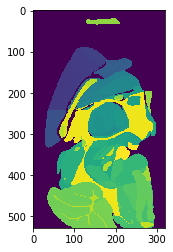

In [206]:
plt.imshow(new_vol[228])

Now check that the new volume's area where the root segment is defined is assigned to id=1

In [207]:
newrootmask = new_vol == 1

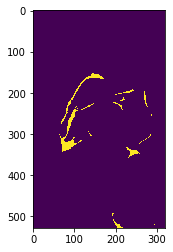

In [208]:
plt.imshow(newrootmask[228])

Looks good.

OK, now let's save this tiff volume.

## Save tiff volume

In [ ]:
new_vol.dtype

In [ ]:
new_vol.shape

In [209]:
filename = '/home/ahoag/ngdemo/data/allen_atlas/annotation_2017_25um_sagittal_16bit_hierarch_labels_fillmissing.tif'
tifffile.imsave(filename,new_vol)

## Save the segment properties file

In [210]:
example_segment_props_dict = {"@type": "neuroglancer_segment_properties",
    "inline": {"ids": ["149"],
               "properties":[{"id": "label", "type": "label", "values":
                              ["PVT: Paraventricular nucleus of the thalamus"]}]}}

In [211]:
segment_props_dict = {"@type": "neuroglancer_segment_properties",
    "inline": {"ids": [],
               "properties":[{"id": "label", "type": "label", "values":
                              []}]}}

In [ ]:
# To do this, I will need a dictionary mapping the new ids to their full region names,
# e.g. "2: grey: Basic cell groups and regions"

In [213]:
segment_props_dict['inline']['ids'] = [str(x) for x in region_fullname_dict.keys()]

In [214]:
segment_props_dict['inline']['properties'][0]['values'] = [str(x) for x in region_fullname_dict.values()]

In [215]:
segment_props_dict

{'@type': 'neuroglancer_segment_properties',
 'inline': {'ids': ['1',
   '2',
   '3',
   '4',
   '5',
   '6',
   '7',
   '8',
   '9',
   '10',
   '11',
   '12',
   '13',
   '14',
   '15',
   '16',
   '17',
   '18',
   '19',
   '20',
   '21',
   '22',
   '23',
   '24',
   '25',
   '26',
   '27',
   '28',
   '29',
   '30',
   '31',
   '32',
   '33',
   '34',
   '35',
   '36',
   '37',
   '38',
   '39',
   '40',
   '41',
   '42',
   '43',
   '44',
   '45',
   '46',
   '47',
   '48',
   '49',
   '50',
   '51',
   '52',
   '53',
   '54',
   '55',
   '56',
   '57',
   '58',
   '59',
   '60',
   '61',
   '62',
   '63',
   '64',
   '65',
   '66',
   '67',
   '68',
   '69',
   '70',
   '71',
   '72',
   '73',
   '74',
   '75',
   '76',
   '77',
   '78',
   '79',
   '80',
   '81',
   '82',
   '83',
   '84',
   '85',
   '86',
   '87',
   '88',
   '89',
   '90',
   '91',
   '92',
   '93',
   '94',
   '95',
   '96',
   '97',
   '98',
   '99',
   '100',
   '101',
   '102',
   '103',
   '104',
   '10

In [216]:
filename = '/home/ahoag/ngdemo/demo_bucket/atlas/allenatlas_2017_16bit_hierarch_labels_fillmissing/segment_properties/info'
with open(filename,'w') as outfile:
    json.dump(segment_props_dict,outfile,indent=2)

## Merge ontology feature
Here we will try to introduce a key that will use the segment properties mapping to collapse a segment you are hovering over to its parent region, along with all children of the same parent.

In [217]:
# neuroglancer.set_static_content_source(url='https://nglancer.pni.princeton.edu')
neuroglancer.set_static_content_source(url='http://localhost:8080')
viewer = neuroglancer.Viewer()
with viewer.txn() as s:
    s.layers['Allen hierarch labels'] = neuroglancer.SegmentationLayer(source='precomputed://http://localhost:1340'
    )
print(viewer)

http://127.0.0.1:42780/v/d443faa0ac8caeb203b89a2dc3e676ee40bd5520/


In [218]:
# some helper graph functions
def get_progeny(dic,input_nodename,progeny_list=None):
    """
    Gets all of the descendents of a given input nodename.
    --- INPUT ---
    dic             The dictionary representing the JSON ontology graph
    input_nodename   The name of the region whose progeny you want to know
    """
    if progeny_list == None:
        progeny_list = []
    if input_nodename == 'root':
        return list(ontology_name_dict.keys()) 
        
    name = dic.get('name')

    children = dic.get('children')
    if name == input_nodename:
        for child in children: # child is a dict
            child_name = child.get('name')
            progeny_list.append(child_name)
            get_progeny(child,input_nodename=child_name,progeny_list=progeny_list)
        return
    
    for child in children:
        child_name = child.get('name')
        get_progeny(child,input_nodename=input_nodename,progeny_list=progeny_list)
    return progeny_list

def get_parent(graph,input_nodename):
    if len(input_nodename.split(' ')) > 1:
        nodename_to_search = f'"{input_nodename}"'
    else:
        nodename_to_search = input_nodename
    edges_pointing_to_node=[x for x in graph.body if f'-> {nodename_to_search}' in x]
    if len(edges_pointing_to_node) == 0:
        return None
    elif len(edges_pointing_to_node) > 1:
        print("Error. There should not be more than one edge pointing to this node")
    else:
        parent_nodename = edges_pointing_to_node[0].split('->')[0].strip()
        # remove the extra quotes surrounding the nodename if there is more than one word
        if len(parent_nodename.split(' ')) > 1:
            return parent_nodename[1:-1]
        else:
            return parent_nodename
    return

In [219]:
get_parent(Gnew,"Cerebrum")

'Basic cell groups and regions'

In [220]:
get_parent(Gnew,"Unassigned area 4")

'root'

In [221]:
progeny_list=get_progeny(data,input_nodename='Medial group of the dorsal thalamus')
progeny_list

['Intermediodorsal nucleus of the thalamus',
 'Mediodorsal nucleus of thalamus',
 'Mediodorsal nucleus of the thalamus, central part',
 'Mediodorsal nucleus of the thalamus, lateral part',
 'Mediodorsal nucleus of the thalamus, medial part',
 'Submedial nucleus of the thalamus',
 'Perireunensis nucleus']

In [224]:
# For the atlas ontology tools we will also need a dictionary mapping region names to new ids
names = list(ontology_id_dict.values())
new_ids = list(ontology_id_dict.keys())
ontology_name_dict = {names[ii]:new_ids[ii] for ii in range(len(names))}

In [225]:
ontology_name_dict

{'root': 1,
 'Basic cell groups and regions': 2,
 'Cerebrum': 3,
 'Cerebral cortex': 4,
 'Cortical plate': 5,
 'Isocortex': 6,
 'Frontal pole, cerebral cortex': 7,
 'Frontal pole, layer 1': 8,
 'Frontal pole, layer 2/3': 9,
 'Frontal pole, layer 5': 10,
 'Frontal pole, layer 6a': 11,
 'Frontal pole, layer 6b': 12,
 'Somatomotor areas': 13,
 'Somatomotor areas, Layer 1': 14,
 'Somatomotor areas, Layer 2/3': 15,
 'Somatomotor areas, Layer 5': 16,
 'Somatomotor areas, Layer 6a': 17,
 'Somatomotor areas, Layer 6b': 18,
 'Primary motor area': 19,
 'Primary motor area, Layer 1': 20,
 'Primary motor area, Layer 2/3': 21,
 'Primary motor area, Layer 5': 22,
 'Primary motor area, Layer 6a': 23,
 'Primary motor area, Layer 6b': 24,
 'Secondary motor area': 25,
 'Secondary motor area, layer 1': 26,
 'Secondary motor area, layer 2/3': 27,
 'Secondary motor area, layer 5': 28,
 'Secondary motor area, layer 6a': 29,
 'Secondary motor area, layer 6b': 30,
 'Somatosensory areas': 31,
 'Somatosensory a

In [226]:
ontology_id_dict[1260]

'dorsal fornix'

In [227]:
ontology_id_dict[1261]

'fimbria'

In [235]:
def init_tool(s):
    print("in init_tool()")
    with viewer.config_state.txn() as st:
        try:
            del st.status_messages['hello']
        except KeyError:
            pass
    print("made it here")
    """ first figure out the selected layer """
    with viewer.txn() as txn:
        if len(txn.layers) > 1:
            selected_layer_name = txn.selectedLayer.layer
            if not selected_layer_name:
                with viewer.config_state.txn() as st:
                    st.status_messages['hello'] = 'No layer selected. Select a layer (right click or ctrl+click the layer panel)'        
                    return None, None
        elif len(txn.layers) == 1:
            print("should be here")
            selected_layer_name = txn.layers[0].name
        else:
            with viewer.config_state.txn() as st:
                st.status_messages['hello'] = 'No layers loaded. First load a layer to use this tool'        
                return None, None
    print("selecting region_map")
    print("layer name:")
    print(selected_layer_name)
    print("selected values:")
    print(s.selected_values)
    try:
        region_map = s.selected_values[selected_layer_name]
    except KeyError:
        # you need to move your cursor to get the layer to be selectable again
        return None, None
    named_tuple = region_map.value
    print("end of init_tool()")
    print("named tuple:")
    print(named_tuple)
    return named_tuple, selected_layer_name

def contract_atlas(s):
    named_tuple, selected_layer_name = init_tool(s)
    if not selected_layer_name:
        return
    if named_tuple:
        with viewer.config_state.txn() as st:
            st.status_messages['hello'] = 'key p pressed: contracting atlas' 
        if named_tuple.value:
            region_id = named_tuple.value
        else:
            region_id = named_tuple.key
        region_name = ontology_id_dict[region_id]
        # Look up parent name and then get corresponding ID
        parent_name = get_parent(Gnew,region_name)
        if not parent_name:
            with viewer.config_state.txn() as st:
                st.status_messages['hello'] = 'No parent found.'
            return
        parent_id = ontology_name_dict.get(parent_name)
        print(parent_id,parent_name)
        # find all progeny of this parent
        progeny_list = get_progeny(final_data,input_nodename=parent_name) # progeny names
        print(progeny_list)
        # initialize our equivalence list using the id-parent relationship we just found
        equivalence_list = [] 
        # Get the progeny ids and include them in the equivalence list
        for progeny_name in progeny_list:
            progeny_id = ontology_name_dict.get(progeny_name)
            if progeny_id:
                equivalence_list.append((progeny_id,parent_id)) 
        with viewer.txn() as txn:
            existing_equivalences = list(txn.layers[selected_layer_name].layer.equivalences.items())
            final_equivalence_list = existing_equivalences + equivalence_list
            txn.layers[selected_layer_name].layer.equivalences = final_equivalence_list
        return
    else:
        with viewer.config_state.txn() as st:
            st.status_messages['hello'] = 'No segment under cursor. Hover over segment to enable hierarchy tools' 
        return
    
def expand_atlas(s):
    named_tuple, selected_layer_name = init_tool(s)
    if not selected_layer_name:
        return
    
    if named_tuple:
        with viewer.config_state.txn() as st:
            st.status_messages['hello'] = 'key c pressed: expanding atlas' 
        """ if the hovered segment is mapped to a parent, then start at the parent level"""
        if named_tuple.value:
            region_id = named_tuple.value
        else:
            region_id = named_tuple.key
        """ Find and remove any existing equivalences that involve this region_id"""
        with viewer.txn() as txn:
            equiv_map = txn.layers[selected_layer_name].layer.equivalences
            if region_id not in equiv_map.keys():
                with viewer.config_state.txn() as st:
                    st.status_messages['hello'] = 'This segment is already at the lowest level in the hierarchy'
            else:
                equiv_map.delete_set(region_id)
        return
    else:
        with viewer.config_state.txn() as st:
            st.status_messages['hello'] = 'No segment under cursor. Hover over segment to enable hierarchy tools' 
        return

In [236]:
# key binding to merge segment with its parent segment using the ontology
def add_key_bindings():
    index = np.random.randint(0,100000)
    viewer.actions.add(f'contract-atlas{index}', contract_atlas)
    viewer.actions.add(f'expand-atlas{index}', expand_atlas)
    with viewer.config_state.txn() as s:
        s.input_event_bindings.viewer['keyp'] = f'contract-atlas{index}'
        s.input_event_bindings.viewer['keyc'] = f'expand-atlas{index}'
        s.status_messages['hello'] = 'Welcome to the merge ontology example. Press p to go up a level, c to go down a level.'


In [234]:
pwd

'/home/ahoag/Git/lightsheet_helper_scripts/neuroglancer'

In [237]:
add_key_bindings()

in init_tool()
made it here
selecting region_map
layer name:
Allen hierarch labels
selected values:
Map({"Allen hierarch labels": {"value": {"key": "382", "label": "Isocortex-un1: Isocortex, unassigned area 1"}}})
end of init_tool()
named tuple:
SegmentIdMapEntry(key=382, value=None, label='Isocortex-un1: Isocortex, unassigned area 1')
in init_tool()
made it here
selecting region_map
layer name:
Allen hierarch labels
selected values:
Map({"Allen hierarch labels": {"value": {"key": "68", "value": "6", "label": "Isocortex: Isocortex"}}})
end of init_tool()
named tuple:
SegmentIdMapEntry(key=68, value=6, label='Isocortex: Isocortex')
in init_tool()
made it here
selecting region_map
layer name:
Allen hierarch labels
selected values:
Map({"Allen hierarch labels": {"value": {"key": "382", "label": "Isocortex-un1: Isocortex, unassigned area 1"}}})
end of init_tool()
named tuple:
SegmentIdMapEntry(key=382, value=None, label='Isocortex-un1: Isocortex, unassigned area 1')
6 Isocortex
['Frontal p

in init_tool()
made it here
selecting region_map
layer name:
Allen hierarch labels
selected values:
Map({"Allen hierarch labels": {"value": {"key": "382", "value": "6", "label": "Isocortex: Isocortex"}}})
end of init_tool()
named tuple:
SegmentIdMapEntry(key=382, value=6, label='Isocortex: Isocortex')
in init_tool()
made it here
selecting region_map
layer name:
Allen hierarch labels
selected values:
Map({"Allen hierarch labels": {"value": {"key": "702", "label": "PVT: Paraventricular nucleus of the thalamus"}}})
end of init_tool()
named tuple:
SegmentIdMapEntry(key=702, value=None, label='PVT: Paraventricular nucleus of the thalamus')
in init_tool()
made it here
selecting region_map
layer name:
Allen hierarch labels
selected values:
Map({"Allen hierarch labels": {"value": {"key": "702", "label": "PVT: Paraventricular nucleus of the thalamus"}}})
end of init_tool()
named tuple:
SegmentIdMapEntry(key=702, value=None, label='PVT: Paraventricular nucleus of the thalamus')
in init_tool()
ma

In [173]:
def reset_equivalences():
    with viewer.txn() as txn:
        txn.layers['Allen hierarch labels'].layer.equivalences = []


In [195]:
reset_equivalences()

In [ ]:
viewer.actions.remove('my-actiondata.get('')', my_action)

In [ ]:
with viewer.config_state.txn() as s:
    del s.input_event_bindings.viewer['keyp']

In [ ]:
with viewer.config_state.txn() as s:
    print(s.input_event_bindings.viewer)

In [150]:
with viewer.txn() as s:
    s.layers['Allen hierarch labels'].layer.equivalences = []
    equivalences = s.layers['Allen hierarch labels'].layer.equivalences.items()
    print(equivalences)

dict_items([])


In [127]:
subG = graphviz.Digraph()
edge_list = [(667, 667), (668, 667), (669, 667), (670, 667), (671, 667), (672, 667), (673, 667), (674, 667), (675, 667), (676, 667), (677, 667), (678, 667), (679, 667), (680, 667), (681, 667), (682, 667), (683, 667), (684, 667), (685, 667), (686, 667), (687, 667), (688, 667), (689, 667), (690, 667), (691, 667), (692, 667), (693, 667), (694, 667), (695, 667), (696, 667), (697, 667), (698, 667), (699, 667), (700, 667), (701, 667), (702, 667), (703, 667), (704, 667), (705, 667), (706, 667), (707, 667), (708, 667), (709, 667), (710, 667), (711, 667), (712, 667), (713, 667), (714, 667), (715, 667)]
for edge in edge_list:
    if edge[0] == edge[1]:
        subG.node(str(edge[0]))
    else:
#     print(edge[0],edge[1])
        subG.edge(str(edge[0]),str(edge[1]))

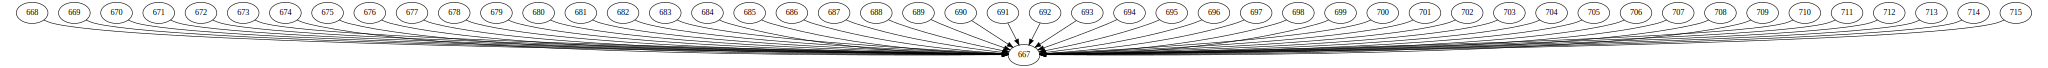

region name: Nucleus of reuniens
parent name: Midline group of the dorsal thalamus
progeny list: ['Paraventricular nucleus of the thalamus', 'Parataenial nucleus', 'Nucleus of reuniens', 'Xiphoid thalamic nucleus']
[(692, 692), (693, 692), (694, 692), (695, 692), (696, 692), (693, 692), (694, 692), (695, 692), (696, 692)]
region name: Nucleus of reuniens
parent name: Midline group of the dorsal thalamus
progeny list: ['Paraventricular nucleus of the thalamus', 'Parataenial nucleus', 'Nucleus of reuniens', 'Xiphoid thalamic nucleus']
[(692, 692), (693, 692), (694, 692), (695, 692), (696, 692), (693, 692), (694, 692), (695, 692), (696, 692)]
region name: Nucleus of reuniens
parent name: Midline group of the dorsal thalamus
progeny list: ['Paraventricular nucleus of the thalamus', 'Parataenial nucleus', 'Nucleus of reuniens', 'Xiphoid thalamic nucleus']
[(692, 692), (693, 692), (694, 692), (695, 692), (696, 692), (693, 692), (694, 692), (695, 692), (696, 692)]


In [128]:
subG

[(695, 695), (692, 695), (693, 695)]
[667]
[(695, 695), (692, 695), (693, 695)]


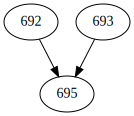

isolating element 692
dict_items([(693, 693), (695, 693)])
isolating element 693
dict_items([])


In [159]:
with viewer.txn() as s:
    s.layers['Allen hierarch labels'].layer.equivalences = [(695,692),(693,692)]
    equiv_map = s.layers['Allen hierarch labels'].layer.equivalences
    edge_list = list(equiv_map.items())
    print(edge_list)
    print(list(equiv_map.members(667)))
    equiv_map.delete_set(667)
    edge_list = list(equiv_map.items())
    print(edge_list)
subG = graphviz.Digraph()
for edge in edge_list:
    if edge[0] == edge[1]:
        subG.node(str(edge[0]))
    else:
        subG.edge(str(edge[0]),str(edge[1]))
subG

In [ ]:
with viewer.txn() as s:
#     s.layers['Allen hierarch labels'].layer.equivalences = [(693, 693), (692, 693), (694, 693), (695, 693), (696, 693)]
    s.layers['Allen hierarch labels'].layer.equivalences = [(693, 693), (692, 693), (694, 693), (695, 693), (696, 693)]
    equiv_map = s.layers['Allen hierarch labels'].layer.equivalences
    edge_list = list(equiv_map.items())
    print(edge_list)
    print(list(equiv_map.members(667)))
    equiv_map.delete_set(667)
    edge_list = list(equiv_map.items())
    print(edge_list)
subG = graphviz.Digraph()
for edge in edge_list:
    if edge[0] == edge[1]:
        subG.node(str(edge[0]))
    else:
        subG.edge(str(edge[0]),str(edge[1]))
subG

In [168]:
def make_subgraph(edge_list):
    subG = graphviz.Digraph()
    for edge in edge_list:
        if edge[0] == edge[1]:
            pass
        else:
            subG.edge(str(edge[0]),str(edge[1]))
    return subG

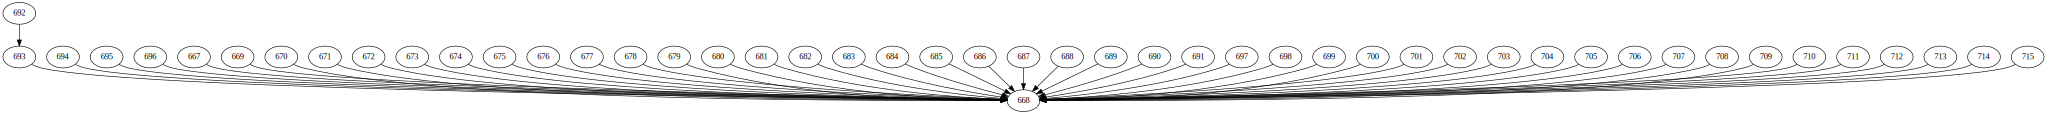

In [169]:
edge_list = [(692, 693), (693, 668), (694, 668), (695, 668), (696, 668), (668, 668), (667, 668), (669, 668), (670, 668), (671, 668), (672, 668), (673, 668), (674, 668), (675, 668), (676, 668), (677, 668), (678, 668), (679, 668), (680, 668), (681, 668), (682, 668), (683, 668), (684, 668), (685, 668), (686, 668), (687, 668), (688, 668), (689, 668), (690, 668), (691, 668), (697, 668), (698, 668), (699, 668), (700, 668), (701, 668), (702, 668), (703, 668), (704, 668), (705, 668), (706, 668), (707, 668), (708, 668), (709, 668), (710, 668), (711, 668), (712, 668), (713, 668), (714, 668), (715, 668)]

G = make_subgraph(edge_list)
G

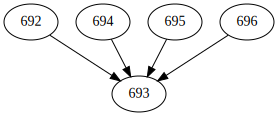

In [170]:
edge_list = [(693, 693), (692, 693), (694, 693), (695, 693), (696, 693)]
G = make_subgraph(edge_list)
G

In [ ]:

prog=get_progeny(data,'root',progeny_list)
prog

In [ ]:
ontology_id_dict[1031]

In [ ]:
ontology_id_dict[1260]

In [ ]:
get_progeny(data,'stria terminalis')

In [ ]:
ontology_name_dict['stria terminalis']

In [ ]:
parent = ontology_id_dict[1031]
while parent != 'Cerebellum':
    parent = get_parent(Gnew,parent)
    print(parent)

In [181]:
def make_graph_current_edges():
    with viewer.txn() as s:
        equiv_map = s.layers['Allen hierarch labels'].layer.equivalences
        edge_list = list(equiv_map.items())
    print(edge_list)
    subG = graphviz.Digraph()
    
    for edge in edge_list:
        if edge[0] == edge[1]:
            pass
        else:
            subG.edge(str(edge[0]),str(edge[1]))
    return subG

[(19, 19), (20, 19), (21, 19), (22, 19), (23, 19), (24, 19)]


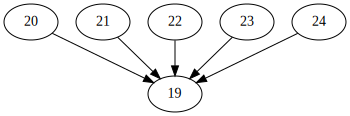

In [190]:
make_graph_current_edges()

[(13, 13), (14, 13), (15, 13), (16, 13), (17, 13), (18, 13), (19, 13), (20, 13), (21, 13), (22, 13), (23, 13), (24, 13), (25, 13), (26, 13), (27, 13), (28, 13), (29, 13), (30, 13)]


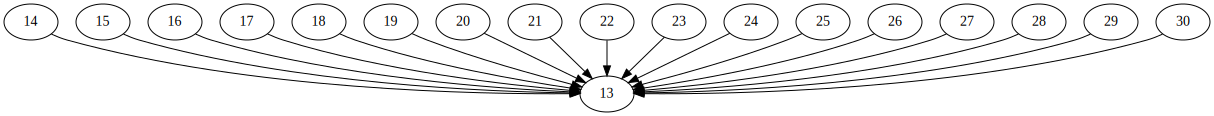

In [192]:
make_graph_current_edges()

In [191]:
1

1

dict_items([(19, 20), (20, 20), (21, 20), (22, 20), (23, 20), (24, 20), (14, 20), (13, 20), (15, 14), (16, 14), (17, 14), (18, 14), (25, 20), (26, 20), (27, 20), (28, 20), (29, 20), (30, 20)])


In [189]:
reset_equivalences()

dict_items([(20, 20), (19, 20), (21, 20), (22, 20), (23, 20), (24, 20)])


[(13, 13), (14, 13), (15, 13), (16, 13), (17, 13), (18, 13), (19, 13), (20, 13), (21, 13), (22, 13), (23, 13), (24, 13), (25, 13), (26, 13), (27, 13), (28, 13), (29, 13), (30, 13)]


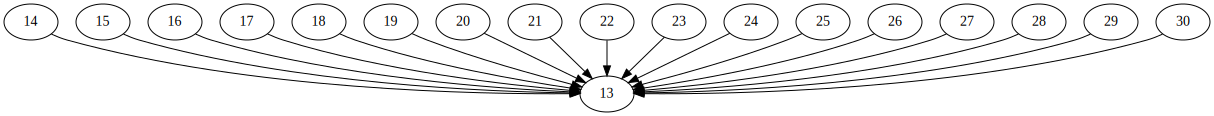

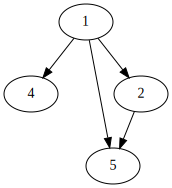

isolating element 13
dict_items([(14, 14), (15, 14), (16, 14), (17, 14), (18, 14), (19, 14), (20, 14), (21, 14), (22, 14), (23, 14), (24, 14), (25, 14), (26, 14), (27, 14), (28, 14), (29, 14), (30, 14)])


In [185]:
edge_list = [(1,4),(1,5),(2,5),(1,2)]
make_subgraph(edge_list)

In [202]:
df_allen

,Unnamed: 0,name,acronym,id,atlas_id,parent_structure_id,parent_name,parent_acronym,voxels_in_structure,fullname,reassigned_id
775,775,"Tuberomammillary nucleus, ventral part",TMv,1,424.0,557.0,Tuberomammillary nucleus,TM,6931,"TMv: Tuberomammillary nucleus, ventral part",776
78,78,"Primary somatosensory area, mouth, layer 6b",SSp-m6b,2,990.0,345.0,"Primary somatosensory area, mouth",SSp-m,7339,"SSp-m6b: Primary somatosensory area, mouth, la...",79
1316,1316,secondary fissure,sec,3,707.0,1040.0,grooves of the cerebellar cortex,grv of CBX,0,sec: secondary fissure,1317
812,812,Inferior colliculus,IC,4,141.0,339.0,"Midbrain, sensory related",MBsen,0,IC: Inferior colliculus,813
1201,1201,internal capsule,int,6,566.0,784.0,corticospinal tract,cst,134366,int: internal capsule,1202
...,...,...,...,...,...,...,...,...,...,...,...
875,875,"Interpeduncular nucleus, intermediate",IPI,607344850,NaN,100.0,NaN,NaN,0,"IPI: Interpeduncular nucleus, intermediate",876
876,876,"Interpeduncular nucleus, dorsomedial",IPDM,607344854,NaN,100.0,NaN,NaN,0,"IPDM: Interpeduncular nucleus, dorsomedial",877
877,877,"Interpeduncular nucleus, dorsolateral",IPDL,607344858,NaN,100.0,NaN,NaN,0,"IPDL: Interpeduncular nucleus, dorsolateral",878
878,878,"Interpeduncular nucleus, rostrolateral",IPRL,607344862,NaN,100.0,NaN,NaN,0,"IPRL: Interpeduncular nucleus, rostrolateral",879


In [204]:
df_cols = df_allen.columns.tolist()
df_cols

['Unnamed: 0',
 'name',
 'acronym',
 'id',
 'atlas_id',
 'parent_structure_id',
 'parent_name',
 'parent_acronym',
 'voxels_in_structure',
 'fullname',
 'reassigned_id']

In [207]:
newcols = ['name','acronym','id','reassigned_id','parent_structure_id','parent_name','parent_acronym','fullname']
output_df=df_allen[newcols]
output_df

,name,acronym,id,reassigned_id,parent_structure_id,parent_name,parent_acronym,fullname
775,"Tuberomammillary nucleus, ventral part",TMv,1,776,557.0,Tuberomammillary nucleus,TM,"TMv: Tuberomammillary nucleus, ventral part"
78,"Primary somatosensory area, mouth, layer 6b",SSp-m6b,2,79,345.0,"Primary somatosensory area, mouth",SSp-m,"SSp-m6b: Primary somatosensory area, mouth, la..."
1316,secondary fissure,sec,3,1317,1040.0,grooves of the cerebellar cortex,grv of CBX,sec: secondary fissure
812,Inferior colliculus,IC,4,813,339.0,"Midbrain, sensory related",MBsen,IC: Inferior colliculus
1201,internal capsule,int,6,1202,784.0,corticospinal tract,cst,int: internal capsule
...,...,...,...,...,...,...,...,...
875,"Interpeduncular nucleus, intermediate",IPI,607344850,876,100.0,NaN,NaN,"IPI: Interpeduncular nucleus, intermediate"
876,"Interpeduncular nucleus, dorsomedial",IPDM,607344854,877,100.0,NaN,NaN,"IPDM: Interpeduncular nucleus, dorsomedial"
877,"Interpeduncular nucleus, dorsolateral",IPDL,607344858,878,100.0,NaN,NaN,"IPDL: Interpeduncular nucleus, dorsolateral"
878,"Interpeduncular nucleus, rostrolateral",IPRL,607344862,879,100.0,NaN,NaN,"IPRL: Interpeduncular nucleus, rostrolateral"


In [209]:
output_df_filename = '/home/ahoag/ngdemo/data/allen_atlas/allen_id_table_w_voxel_counts_hierarch_labels.csv'
output_df.to_csv(output_df_filename)

In [210]:
df = pd.read_csv(output_df_filename)
df

,Unnamed: 0,name,acronym,id,reassigned_id,parent_structure_id,parent_name,parent_acronym,fullname
0,775,"Tuberomammillary nucleus, ventral part",TMv,1,776,557.0,Tuberomammillary nucleus,TM,"TMv: Tuberomammillary nucleus, ventral part"
1,78,"Primary somatosensory area, mouth, layer 6b",SSp-m6b,2,79,345.0,"Primary somatosensory area, mouth",SSp-m,"SSp-m6b: Primary somatosensory area, mouth, la..."
2,1316,secondary fissure,sec,3,1317,1040.0,grooves of the cerebellar cortex,grv of CBX,sec: secondary fissure
3,812,Inferior colliculus,IC,4,813,339.0,"Midbrain, sensory related",MBsen,IC: Inferior colliculus
4,1201,internal capsule,int,6,1202,784.0,corticospinal tract,cst,int: internal capsule
...,...,...,...,...,...,...,...,...,...
1322,875,"Interpeduncular nucleus, intermediate",IPI,607344850,876,100.0,NaN,NaN,"IPI: Interpeduncular nucleus, intermediate"
1323,876,"Interpeduncular nucleus, dorsomedial",IPDM,607344854,877,100.0,NaN,NaN,"IPDM: Interpeduncular nucleus, dorsomedial"
1324,877,"Interpeduncular nucleus, dorsolateral",IPDL,607344858,878,100.0,NaN,NaN,"IPDL: Interpeduncular nucleus, dorsolateral"
1325,878,"Interpeduncular nucleus, rostrolateral",IPRL,607344862,879,100.0,NaN,NaN,"IPRL: Interpeduncular nucleus, rostrolateral"
